In [1]:
import os
from collections import namedtuple

In [2]:
import GRILL_io as grill
spektr = grill.read_spectrum("spektr.utf8.txt")

['ntor', '|An|^2', 'Re[An]', 'Im[An]', 'Ntor']
{'ntor': [], '|An|^2': [], 'Re[An]': [], 'Im[An]': [], 'Ntor': []}
401


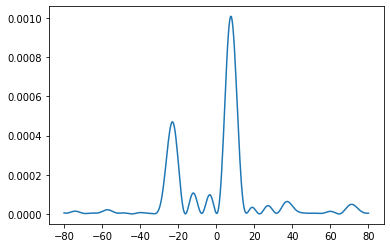

In [3]:
import matplotlib.pyplot as plt
plt.plot(spektr['Ntor'], spektr['|An|^2']);

### конвертация для астры

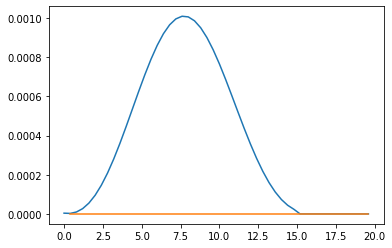

In [8]:
sp = [x for x in zip(spektr['Ntor'], spektr['|An|^2'])]
#print(sp)
emp = 1
bias = 0.0
sp_pos = [ (s[0], emp*s[1]+bias if (s[0]<15) else bias) for s in sp if s[0]>=0 and s[0]<20]
sp_neg = [ (-s[0], bias) for s in sp if s[0]<0 and s[0]>-20]
sp_neg = list(reversed(sp_neg))

x = [s[0] for s in sp_pos]
y = [s[1] for s in sp_pos]
plt.plot(x,y)
x = [s[0] for s in sp_neg]
y = [s[1] for s in sp_neg]
plt.plot(x,y);

In [10]:
    
    file_path = os.path.abspath("40167_header.dat")
    file = open(file_path)

    lines = file.readlines()
    print(len(lines))

    lines.append("!!positive Nfi; P_LH(a.units); points<1001\n")
    for s in sp_pos:
        lines.append(str(s[0]) + "   " + str(s[1])+"\n")
    print(len(lines))

    power = 1.0
    lines.append(str(power) + '	-88888. !0.57 first value=part(%) of total power in positive spectrum.\n')
    lines.append('!!negative Nfi; P_LH(a.units); points number<1001, arbitrary spacing.\n')

    for s in sp_neg:
        lines.append(str(s[0]) + "   " + str(s[1])+"\n")
    print(len(lines))

    file_path = os.path.abspath("40167_123.dat")
    with open(file_path, 'w') as f:
        for line in lines:
            f.write(line)

52
103
154
